In [1]:
import numpy as np
import astropy.units as u
from IPython.display import clear_output
import time
from pathlib import Path
from matplotlib.patches import Circle

import proper

import roman_phasec_proper
roman_phasec_proper.copy_here()

from importlib import reload
import misc

wavelength_c = 825e-9*u.m

D = 2.3631*u.m
mas_per_lamD = (wavelength_c/D*u.radian).to(u.mas)

psf_pixelscale = 13e-6*u.m/u.pixel
psf_pixelscale_lamD_ref = 1/2
wavelength_ref = 0.5e-6*u.m

psf_pixelscale_lamD = wavelength_ref/wavelength_c * psf_pixelscale_lamD_ref

npsf = 256

iwa = 5.4
owa = 20

# Define wavelength arrays for monochromatic and broadband PSFs
lam0 = wavelength_c.to(u.um).value

lam_array_mono = np.array([lam0])

nlam = 3
bandwidth = 0.1
minlam = lam0 * (1 - bandwidth/2)
maxlam = lam0 * (1 + bandwidth/2)
lam_array_broad = np.linspace( minlam, maxlam, nlam )

# Options for testing without OPDs
options1 = {'cor_type':'spc-wide', # change coronagraph type to correct band
            'final_sampling_m':psf_pixelscale.value,
            'source_x_offset':0,
            'source_y_offset':0,
            'use_fpm':1,
            'use_field_stop':0,
            'use_errors':0,
            'use_lens_errors':0,
            'use_pupil_defocus':0,
            'use_dm1':0,
            'use_dm2':0,
            'polaxis':0,   
           }

# Options for testing with OPDs
dm1 = proper.prop_fits_read( roman_phasec_proper.lib_dir + r'/examples/spc_wide_band4_best_contrast_dm1.fits' )
dm2 = proper.prop_fits_read( roman_phasec_proper.lib_dir + r'/examples/spc_wide_band4_best_contrast_dm2.fits' )

options2 = {'cor_type':'spc-wide', # change coronagraph type to correct band
            'final_sampling_m':psf_pixelscale.value,
            'source_x_offset':0,
            'source_y_offset':0,
            'use_fpm':1,
            'use_field_stop':0,
            'use_errors':1,
            'use_lens_errors':1,
            'use_pupil_defocus':1,
            'use_dm1':1, 'dm1_m':dm1, 
            'use_dm2':1, 'dm2_m':dm2,
            'polaxis':10,   
           }

data_dir = Path('/groups/douglase/kians-data-files/poppy-cupy-tests-data')

# Test without OPDs implemented

### Monochromatic Test

Lambda = 8.2500E-07   Throughput = 1.00
Applying lens
Propagating to secondary
Applying lens
Propagating to POMA FOLD
Propagating to M3
Applying lens
Propagating to M4
Applying lens
Propagating to M5
Applying lens
Propagating to TT FOLD
Propagating to FSM
Propagating to OAP1
Applying lens
Propagating to FOCM
Propagating to OAP2
Applying lens
Propagating to DM1
Propagating to DM2
Propagating to OAP3
Applying lens
Propagating to FOLD_3
Propagating to OAP4
Applying lens
Propagating to PUPIL_MASK
Propagating to OAP5
Applying lens
Propagating to FPM
Propagating to OAP6
Applying lens
Propagating to LYOT STOP
Propagating to OAP7
Applying lens
Propagating to FIELD_STOP
Propagating to OAP8
Applying lens
Propagating to filter
Propagating to IMAGING LENS
Applying lens at IMAGING LENS lens #1
Propagating
Applying lens at IMAGING LENS lens #2
Propagating to IMAGE
Total elapsed time (seconds) =  40.9445


IndexError: tuple index out of range

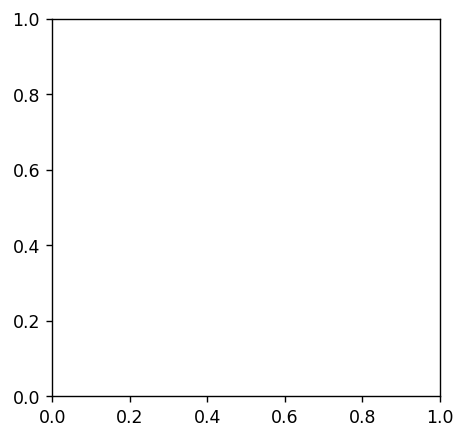

In [2]:
wfs, pxscls_m = proper.prop_run('roman_phasec', lam0, npsf, QUIET=False, PASSVALUE=options1)

psf_mono = np.abs(wfs[0])**2

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.myimshow(psf_mono, lognorm=True, pxscl=psf_pixelscale_lamD.value, patches=patches, vmin=1e-14)

In [ ]:
reload(misc)
misc.save_pickle(data_dir/'spcw_proper_wfs_mono', wfs)

### Broadband Test

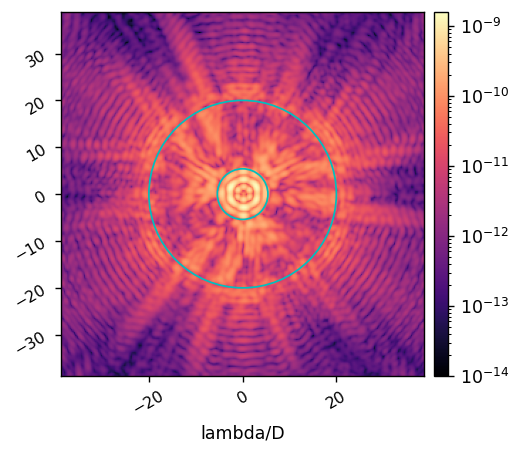

In [6]:
wfs, pxscls_m = proper.prop_run_multi('roman_phasec', lam_array_broad, npsf, QUIET=True, PASSVALUE=options1)

psfs_mono = np.abs(wfs)**2
psf_broad = np.sum(psfs_mono, axis=0)/nlam

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.myimshow(psf_broad, lognorm=True, pxscl=psf_pixelscale_lamD.value, patches=patches, vmin=1e-14)

# Test with OPDs implemented

### Monochromatic Test

Lambda = 8.2500E-07   Throughput = 1.00
Applying lens
Propagating to secondary
Applying lens
Propagating to POMA FOLD
Propagating to M3
Applying lens
Propagating to M4
Applying lens
Propagating to M5
Applying lens
Propagating to TT FOLD
Propagating to FSM
Propagating to OAP1
Applying lens
Propagating to FOCM
Propagating to OAP2
Applying lens
Propagating to DM1
Propagating to DM2
Propagating to OAP3
Applying lens
Propagating to FOLD_3
Propagating to OAP4
Applying lens
Propagating to PUPIL_MASK
Propagating to OAP5
Applying lens
Propagating to FPM
Propagating to OAP6
Applying lens
Propagating to LYOT STOP
Propagating to OAP7
Applying lens
Propagating to FIELD_STOP
Propagating to OAP8
Applying lens
Propagating to filter
Propagating to IMAGING LENS
Applying lens at IMAGING LENS lens #1
Propagating
Applying lens at IMAGING LENS lens #2
Propagating to IMAGE
Total elapsed time (seconds) =  56.3919


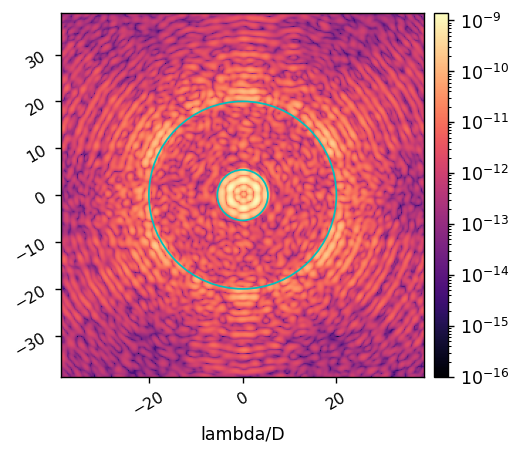

In [8]:
wfs, pxscls_m = proper.prop_run_multi('roman_phasec', lam_array_mono, npsf, QUIET=False, PASSVALUE=options2)

psf_mono = np.abs(wfs[0])**2

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.myimshow(psf_mono, lognorm=True, pxscl=psf_pixelscale_lamD.value, patches=patches, vmin=1e-16)

### Broadband Test

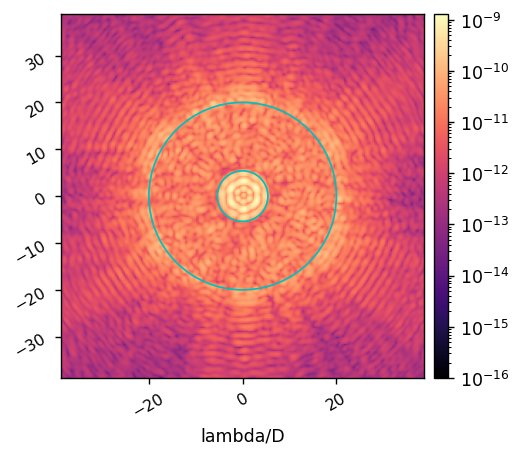

In [9]:
wfs, pxscls_m = proper.prop_run_multi('roman_phasec', lam_array_broad, npsf, QUIET=True, PASSVALUE=options2)

psfs_mono = np.abs(wfs)**2
psf_broad = np.sum(psfs_mono, axis=0)/nlam

patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.myimshow(psf_broad, lognorm=True, pxscl=psf_pixelscale_lamD.value, patches=patches, vmin=1e-16)

# Perform speed tests with and without using PYFFTW and Intel MKL FFT.

In [2]:
n_itr = 1 # number of iterations to calculate a PSF for each case

proper.prop_fftw_wisdom(2048) # create FFTW wisdom file

In [ ]:
proper.prop_use_ffti(DISABLE=False)
proper.prop_use_fftw(DISABLE=False)

In [6]:
times_mono_1 = []
for i in range(n_itr):
    start = time.time()
    wfs, pxscls_m = proper.prop_run_multi('roman_phasec', lam_array_mono, npsf, QUIET=True, PASSVALUE=options1)
    times_mono_1.append(time.time()-start)
    print('PSF computed in {:.3f}'.format(times_mono_1[i]))
clear_output(wait=True)
    
times_broad_1 = []
for i in range(n_itr):
    start = time.time()
    wfs, pxscls_m = proper.prop_run_multi('roman_phasec', lam_array_mono, npsf, QUIET=True, PASSVALUE=options1)
    times_broad_1.append(time.time()-start)
    print('PSF computed in {:.3f}'.format(times_mono_1[i]))
clear_output(wait=True)

times_mono_2 = []
for i in range(n_itr):
    start = time.time()
    wfs, pxscls_m = proper.prop_run_multi('roman_phasec', lam_array_mono, npsf, QUIET=True, PASSVALUE=options1)
    times_mono_2.append(time.time()-start)
    print('PSF computed in {:.3f}'.format(times_mono_1[i]))
clear_output(wait=True)

times_broad_2 = []
for i in range(n_itr):
    start = time.time()
    wfs, pxscls_m = proper.prop_run_multi('roman_phasec', lam_array_mono, npsf, QUIET=True, PASSVALUE=options1)
    times_broad_2.append(time.time()-start)
    print('PSF computed in {:.3f}'.format(times_mono_1[i]))
clear_output(wait=True)


PSF computed in 10.903
